<a href="https://colab.research.google.com/github/codeManZuo/machine_learning/blob/main/ml_study_54zhcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**先看下测试数据**

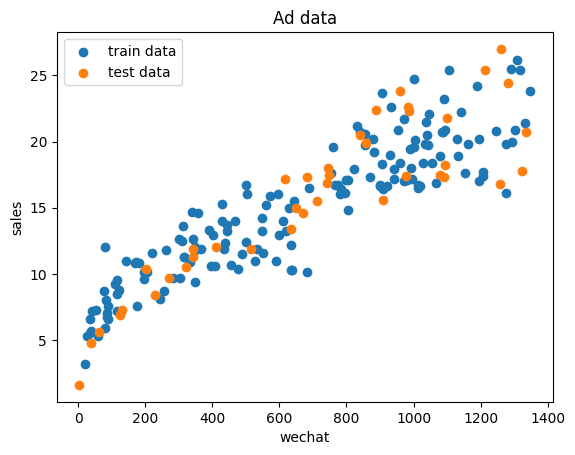

In [ ]:
import pandas as pd
import tkinter
import matplotlib.pyplot as plt

data = pd.read_csv('advertising.csv')

# 得到训练和测试数据
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name = 'wechat'
output_param_name = 'sales'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[input_param_name].values
y_test = test_data[output_param_name].values

plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Ad data')
plt.legend()
plt.show()


**样本数据预处理函数**

In [139]:
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
import numpy as np


def normalize(features):
    features_nomalized = np.copy(features).astype(float)
    features_mean = np.mean(features,0)
    features_deviation = np.std(features,0)
    if features.shape[0] > 1:
        features_nomalized -= features_mean
    print("type+type:",type(features_deviation))
    features_deviation[features_deviation==0]=1
    features_nomalized/=features_deviation
    return features_nomalized,features_mean,features_deviation

def prepare_for_training(data,polynomial_degree=0,sinusoid_degree=0,normalize_data=0):
    num_examples = data.shape[0]
    data_processed = np.copy(data)

    feature_mean = 0
    features_deviation = 0
    # data_nomalized = data_processed
    print("type666",type(data_processed))
    if normalize_data:
        (
            data_nomalized,
            feature_mean,
            features_deviation
        ) = normalize(data_processed)
        data_processed = data_nomalized
    data_processed = np.hstack((np.ones((num_examples,1)),data_processed))
    return data_processed,feature_mean,features_deviation




class LinearRegression:
    def __init__(self, data, labels, polynomial_degree=0, sinusoid_degree=0, normalize_data=True):
        print("type111",type(data))
        (data_processed,
         features_mean,
         features_deviation) = prepare_for_training(data, polynomial_degree, sinusoid_degree, normalize_data)
        # 使用预处理后的数据作为训练集数据
        self.data = data_processed
        # 标签值
        self.labels = labels
        self.features_mean = features_mean
        self.features_deviation = features_deviation
        # 将多项式次数赋值给类的实例变量
        self.polynomial_degree = polynomial_degree
        # 将正弦函数次数赋值给类的实例变量
        self.sinusoid_degree = sinusoid_degree
        # 将是否规范化数据的标志赋值给类的实例变量
        self.normalize_data = normalize_data

        # 获取数据的特征数量（列数）
        num_features = self.data.shape[1]
        # 初始化theta参数为零向量，大小为(num_features, 1)，例如三个特征的，三行一列
        # [[0.0],
        #  [0.0],
        #  [0.0]]find . -type d -name "__pycache__" -exec rm -r {} +find . -type d -name "__pycache__" -exec rm -r {} +
        self.theta = np.zeros((num_features, 1))

    # 训练模型
    def train(self, alpha, num_iterations=500):
        """
        :param alpha: 梯度下降的学习率
        :param num_iterations:梯度下降的迭代次数
        """
        loss_history = self.gradient_descent(alpha, num_iterations)
        return self.theta,loss_history

    def gradient_descent(self,alpha,num_iterations):
        loss_history = []
        for _ in range(num_iterations):
            self.gradient_step(alpha)
            loss_history.append(self.cal_loss(self.data,self.labels))
        return loss_history

    def gradient_step(self, alpha):
        # 这里我们使用批量梯度下降，样本数就是训练集的大小
        train_data_num = self.data.shape[0]
        # 执行一次假设预测
        prediction = LinearRegression.hypothesis(self.data, self.theta)
        # 计算预测值和实际值的差值
        delta = prediction - self.labels
        theta = self.theta
        # 更新theta参数
        theta = theta - alpha * (1/train_data_num)*(np.dot(delta.T,self.data)).T
        self.theta = theta

    def cal_loss(self,data,lables):
        train_data_num = data.shape[0]
        delta = LinearRegression.hypothesis(self.data,self.theta)-lables
        # 计算的是误差的平方和 （均方误差）
        loss = (1/2)*np.dot(delta.T,delta)/train_data_num
        # loss就是一个1，1的矩阵，直接取标量值即可（无维度的单一数值）
        return loss[0][0]

    def predict(self, data):
        print("type444",type(data))
        data_processed = prepare_for_training(data,
                                              self.polynomial_degree,
                                              self.sinusoid_degree,
                                              self.normalize_data)[0]
        predictions = LinearRegression.hypothesis(data_processed, self.theta)
        return predictions

    @staticmethod
    def hypothesis(data, theta):
        # 计算预测值
        predictions = np.dot(data, theta)
        return predictions

    def get_cost(self, data, labels):
        data_processed = prepare_for_training(data, self.polynomial_degree, self.sinusoid_degree, self.normalize_data)[0]
        return self.cal_loss(data_processed, labels)



data = pd.read_csv('advertising.csv')

# 得到训练和测试数据
train_data = data.sample(frac=0.8)
print("type222",type(train_data))
test_data = data.drop(train_data.index)
print("type333",type(test_data))

input_param_name = 'wechat'
output_param_name = 'sales'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[input_param_name].values
y_test = test_data[output_param_name].values

# 定义梯度下降迭代次数
num_iterations = 500
# 定义学习率
learning_rate = 0.01

linear_regression = LinearRegression(x_train,y_train)
(theta,cost_history) = linear_regression.train(learning_rate,num_iterations)
print("开始时的损失值：",cost_history[0])
print("训练后的损失值：",cost_history[-1])


type222 <class 'pandas.core.frame.DataFrame'>
type333 <class 'pandas.core.frame.DataFrame'>
type111 <class 'numpy.ndarray'>
type666 <class 'numpy.ndarray'>
type+type: <class 'numpy.ndarray'>
开始时的损失值： 126.83430219436573
训练后的损失值： 2.8184377717606104


**画出损失值的变化函数**

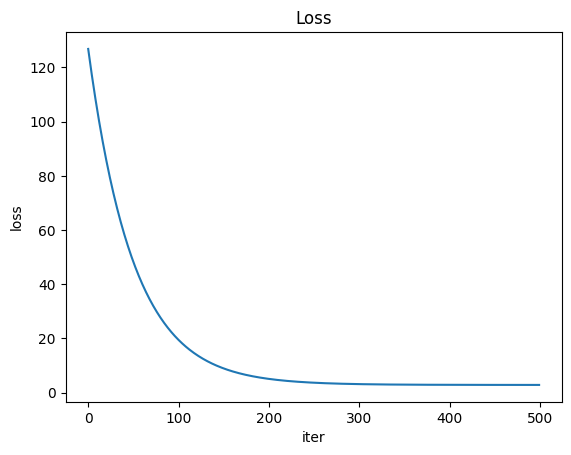

In [140]:
plt.plot(range(num_iterations),cost_history)
plt.xlabel('iter')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

**基于训练的模型测试**

min 3.2
max 1348.6
[[   3.2       ]
 [  16.78989899]
 [  30.37979798]
 [  43.96969697]
 [  57.55959596]
 [  71.14949495]
 [  84.73939394]
 [  98.32929293]
 [ 111.91919192]
 [ 125.50909091]
 [ 139.0989899 ]
 [ 152.68888889]
 [ 166.27878788]
 [ 179.86868687]
 [ 193.45858586]
 [ 207.04848485]
 [ 220.63838384]
 [ 234.22828283]
 [ 247.81818182]
 [ 261.40808081]
 [ 274.9979798 ]
 [ 288.58787879]
 [ 302.17777778]
 [ 315.76767677]
 [ 329.35757576]
 [ 342.94747475]
 [ 356.53737374]
 [ 370.12727273]
 [ 383.71717172]
 [ 397.30707071]
 [ 410.8969697 ]
 [ 424.48686869]
 [ 438.07676768]
 [ 451.66666667]
 [ 465.25656566]
 [ 478.84646465]
 [ 492.43636364]
 [ 506.02626263]
 [ 519.61616162]
 [ 533.20606061]
 [ 546.7959596 ]
 [ 560.38585859]
 [ 573.97575758]
 [ 587.56565657]
 [ 601.15555556]
 [ 614.74545455]
 [ 628.33535354]
 [ 641.92525253]
 [ 655.51515152]
 [ 669.10505051]
 [ 682.69494949]
 [ 696.28484848]
 [ 709.87474747]
 [ 723.46464646]
 [ 737.05454545]
 [ 750.64444444]
 [ 764.23434343]
 [ 777.82424

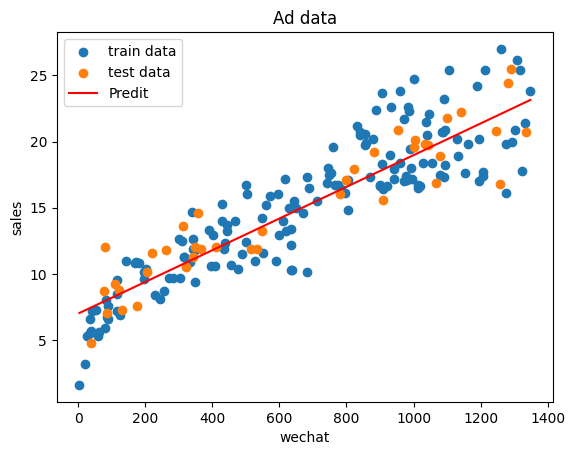

In [141]:
predict_num = 100
print("min",x_train.min())
print("max",x_train.max())
x_predictions = np.linspace(x_train.min(),x_train.max(),predict_num).reshape(-1,1)
print(x_predictions)
y_predictions = linear_regression.predict(x_predictions)
print(y_predictions)

plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(x_predictions,y_predictions,'r',label='Predit')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Ad data')
plt.legend()
plt.show()

In [ ]:
p